# Hello PyTorch

In this notebook we'll go through a few examples of how to train models in PyTorch.<br> 
We first train a single layer neural network on arbitrary data, then slowly work our way up to train a handwritten digit classifier!


## Tensors

In [0]:
import torch

In [0]:
t1 = torch.tensor([1, 2, 3, 4])
t2 = torch.tensor([0.1, 0.2, 0.3, 0.4], requires_grad = True)
t3 = torch.tensor([[11,12,13,14]], dtype = torch.float, requires_grad = True)
t4 = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]], dtype = torch.float, requires_grad = True)

print(f't1: {t1}')
print(f't2: {t2}')
print(f't3: {t3}')
print(f't4: {t4}')

t1: tensor([1, 2, 3, 4])
t2: tensor([0.1000, 0.2000, 0.3000, 0.4000], requires_grad=True)
t3: tensor([[11., 12., 13., 14.]], requires_grad=True)
t4: tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]], requires_grad=True)


In [0]:
T1 = t1 + t2 + t3
T2 = t2*t3

# Matrix multiplication
# (1x4).(4x3) => (1, 3) 
T3 = torch.mm(t3, t4)

print(f'T1: {T1}')
print(f'T2: {T2}')
print(f'T3: {T3}')

T1: tensor([[12.1000, 14.2000, 16.3000, 18.4000]], grad_fn=<AddBackward0>)
T2: tensor([[1.1000, 2.4000, 3.9000, 5.6000]], grad_fn=<MulBackward0>)
T3: tensor([[290., 340., 390.]], grad_fn=<MmBackward>)


## Autograd
grad and grad_fn

In [0]:
y = T3.mean()
print('Gradients before')
print(f't1: {t1.grad}\nt2: {t2.grad}\nt3: {t3.grad}\nt4: {t4.grad}')

y.backward()

print('\n\nGradients after backward()')
print(f't1: {t1.grad}\nt2: {t2.grad}\nt3: {t3.grad}\nt4: {t4.grad}')

Gradients before
t1: None
t2: None
t3: None
t4: None


Gradients after backward()
t1: None
t2: None
t3: tensor([[ 2.,  5.,  8., 11.]])
t4: tensor([[3.6667, 3.6667, 3.6667],
        [4.0000, 4.0000, 4.0000],
        [4.3333, 4.3333, 4.3333],
        [4.6667, 4.6667, 4.6667]])


## Network layer

In [0]:
layer = torch.nn.Linear(4, 2)
activation = torch.nn.Sigmoid() # ReLU, Softmax, others also available 

output = activation(layer(t2))
print(output)

tensor([0.3149, 0.5673], grad_fn=<SigmoidBackward>)



* Weights and biases initialized 'uniformly at random'
* Kaiming uniform method for weights
* LeCunn unit method for bias

## Optimizer

In [0]:
from torch import optim

In [0]:
optimizer = optim.SGD(layer.parameters(), lr = 0.1)
# optimizer

In [0]:
print(f'Weights of layer before step(): \n{layer.weight.data}')
error = torch.sum(output)
error.backward()
optimizer.step()
print(f'\n\nWeights of layer after step(): \n{layer.weight.data}')

Weights of layer before step(): 
tensor([[-0.1816, -0.4991, -0.4070, -0.3187],
        [-0.4037,  0.3861,  0.3826, -0.0921]])


Weights of layer after step(): 
tensor([[-0.1837, -0.5034, -0.4135, -0.3273],
        [-0.4062,  0.3812,  0.3752, -0.1019]])


# Model Training

In [0]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

## Single Layer Network

* Create arbitrary tensors for data
* Train a single layer linear network on data

### Let's first look at a single sample

In [0]:
features = torch.tensor([1, 2, 3, 4], dtype = torch.float, requires_grad = True)
label = torch.tensor([0], dtype = torch.float)

LEARNING_RATE = 1e-4
torch.manual_seed(10)

linear_layer = nn.Linear(4, 1)
loss_function = nn.MSELoss()
optimizer = optim.SGD(linear_layer.parameters(), lr = LEARNING_RATE)

Think about the possibilities that could work - <br>
y = x1   +   x2   +   x3   +   x4   -   10 <br>
y = x1   -   x2   -   x3   +   x4 <br>
y = -2x1 + x2 + x3 + x4 - 7 <br>
(infinite solutions)

Training over a single epoch -

In [0]:
print(f'Weights before training {linear_layer.weight}\n')
print(f'Bias before training {linear_layer.bias}\n')
#-------------------------------------------------------------

# Forward pass
prediction = linear_layer(features)
print(f'Prediction before training: {prediction}\n')   # Check prediction before training

# Compute loss
loss = loss_function(prediction, label)

# Backpropagate
loss.backward()
optimizer.step()

#-------------------------------------------------------------
# Let's check how the model does
print(f'Weights after training {linear_layer.weight}\n')
print(f'Bias after training {linear_layer.bias}\n')
print(f'Prediction after training {linear_layer(features)}\n')

Weights before training Parameter containing:
tensor([[-0.0419, -0.0171, -0.1875,  0.1150]], requires_grad=True)

Bias before training Parameter containing:
tensor([-0.2861], requires_grad=True)

Prediction before training: tensor([-0.4647], grad_fn=<AddBackward0>)

Weights after training Parameter containing:
tensor([[-0.0418, -0.0170, -0.1872,  0.1154]], requires_grad=True)

Bias after training Parameter containing:
tensor([-0.2860], requires_grad=True)

Prediction after training tensor([-0.4618], grad_fn=<AddBackward0>)



That's not much of an improvement at all. Let's try training over more epochs.

In [0]:
prediction = linear_layer(features)
print(f'Weights before training {linear_layer.weight}')
print(f'Bias before training {linear_layer.bias}')
print(f'Prediction before training: {prediction}')   # Check prediction before training


N_EPOCHS = 15
for i in range(N_EPOCHS):
  # Forward pass
  prediction = linear_layer(features)
  # Compute loss
  loss = loss_function(prediction, label)
  # Backpropagate
  loss.backward()
  optimizer.step()

Weights before training Parameter containing:
tensor([[-0.0418, -0.0170, -0.1872,  0.1154]], requires_grad=True)
Bias before training Parameter containing:
tensor([-0.2860], requires_grad=True)
Prediction before training: tensor([-0.4618], grad_fn=<AddBackward0>)


Let's see how we did now

In [0]:
print(f'Weights after training {linear_layer.weight}')
print(f'Bias after training {linear_layer.bias}')
print(f'Prediction after training {linear_layer(features)}')

Weights after training Parameter containing:
tensor([[-0.0309,  0.0048, -0.1546,  0.1589]], requires_grad=True)
Bias after training Parameter containing:
tensor([-0.2751], requires_grad=True)
Prediction after training tensor([-0.1246], grad_fn=<AddBackward0>)


Putting it all together - 

In [0]:
features = torch.tensor([1, 2, 3, 4], dtype = torch.float, requires_grad = True)
label = torch.tensor([0], dtype = torch.float)

LEARNING_RATE = 1e-4
torch.manual_seed(10)

linear_layer = nn.Linear(4, 1)
loss_function = nn.MSELoss()
optimizer = optim.SGD(linear_layer.parameters(), lr = LEARNING_RATE)

# Check performance before training
print('BEFORE TRAINING\n')
prediction = linear_layer(features)
print(f'Weights before training {linear_layer.weight}')
print(f'Bias before training {linear_layer.bias}')
print(f'Prediction before training: {prediction}')   # Check prediction before training


N_EPOCHS = 5
for i in range(N_EPOCHS):
  # Forward pass
  prediction = linear_layer(features)
  # Compute loss
  loss = loss_function(prediction, label)
  # Backpropagate
  loss.backward()
  optimizer.step()

# Check performance after training
print('\n\n\nAFTER TRAINING\n')
prediction = linear_layer(features)
print(f'Weights after training {linear_layer.weight}\n')
print(f'Bias after training {linear_layer.bias}\n')
print(f'Prediction after training: {prediction}')   # Check prediction after training

BEFORE TRAINING

Weights before training Parameter containing:
tensor([[-0.0419, -0.0171, -0.1875,  0.1150]], requires_grad=True)
Bias before training Parameter containing:
tensor([-0.2861], requires_grad=True)
Prediction before training: tensor([-0.4647], grad_fn=<AddBackward0>)



AFTER TRAINING

Weights after training Parameter containing:
tensor([[-0.0405, -0.0144, -0.1834,  0.1205]], requires_grad=True)

Bias after training Parameter containing:
tensor([-0.2847], requires_grad=True)

Prediction after training: tensor([-0.4221], grad_fn=<AddBackward0>)


### Training over multiple samples

We generate a dataset from the multiple samples, and then divide into batches using a dataloader

In [0]:
# Multi-dimensional features and labels
features = torch.tensor([[1, 2, 3, 4],
                        [5, 6, 7, 8],
                        [9, 10, 11, 12],
                        [13, 14, 15, 15]], dtype = torch.float, requires_grad = True)
labels = torch.tensor([0.3, 0.4, 0.5, 0.6])

LEARNING_RATE = 1e-4              # Try changing learning rate to 1e-2. What happens? 
BATCH_SIZE = 2
N_EPOCHS = 5
torch.manual_seed(10)

# This is new - 
train_dataset = TensorDataset(features, labels)
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)

linear_layer = nn.Linear(4, 1)
loss_function = nn.MSELoss()
optimizer = optim.SGD(linear_layer.parameters(), lr = LEARNING_RATE)

# Check performance before training
print('BEFORE TRAINING\n')
prediction = linear_layer(features)
print(f'Weights before training {linear_layer.weight}\n')
print(f'Bias before training {linear_layer.bias}\n')
print(f'Prediction before training: {prediction}\n')   # Check prediction before training


for epoch in range(N_EPOCHS):
  for (features_val, label) in train_loader:    # Now iterating through batches as well
    # This is new. Setting the gradients to zero
    linear_layer.zero_grad()
    # Forward pass
    prediction = linear_layer(features_val)

    # Compute loss
    loss = loss_function(prediction, label.view(-1, 1))

    # Backpropagate
    loss.backward()
    optimizer.step()

# Check performance after training
print('\n\n\nAFTER TRAINING\n')
prediction = linear_layer(features)
print(f'Weights after training {linear_layer.weight}\n')
print(f'Bias after training {linear_layer.bias}\n')
print(f'Prediction after training: {prediction}')   # Check prediction after training

BEFORE TRAINING

Weights before training Parameter containing:
tensor([[-0.0419, -0.0171, -0.1875,  0.1150]], requires_grad=True)

Bias before training Parameter containing:
tensor([-0.2861], requires_grad=True)

Prediction before training: tensor([[-0.4647],
        [-0.9908],
        [-1.5170],
        [-2.1582]], grad_fn=<AddmmBackward>)




AFTER TRAINING

Weights after training Parameter containing:
tensor([[-0.0194,  0.0079, -0.1599,  0.1442]], requires_grad=True)

Bias after training Parameter containing:
tensor([-0.2835], requires_grad=True)

Prediction after training: tensor([[-0.1903],
        [-0.2995],
        [-0.4088],
        [-0.6622]], grad_fn=<AddmmBackward>)


## Two-Layer Network
* Download a CSV dataset from an online repository
* Train a two layer network on the data

### Handling a CSV dataset

Let's try training on non-arbitrary data now. Data is often distributed online in the form of CSV files.<br>
One such dataset is the *wine* dataset from the UCI Machine Learning Repository. <br>
Let's download the data first -

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data -O ./wine.csv

--2020-05-17 17:39:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [application/x-httpd-php]
Saving to: ‘./wine.csv’

./wine.csv          100%[===================>]  10.53K  --.-KB/s    in 0s      

2020-05-17 17:39:15 (81.4 MB/s) - ‘./wine.csv’ saved [10782/10782]



The dataset is now stored in the file `wine.csv` in the current working directory. If you've done any kind of machine learning before, you'll have worked with `pandas`, a Python module for handling csv datasets. Let's import that and use it here -

In [0]:
import pandas as pd

In [0]:
dataset = pd.read_csv('wine.csv', header = None)
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Good. Now let's divide the dataset into features and labels. Traditionally, you investigate the source of the data for that information. In this case, the UCI ML repository tells us that the `1st` column contains wine labels and the other columns contain features like `Malic Acid`, `Ash`, `Hue` etc. <br>

In [0]:

labels = dataset.iloc[:, 0]
features = dataset.iloc[:, 1:]

Now, to convert the data into a format PyTorch can work with - torch.tensor

In [0]:
features = torch.tensor(features.values, dtype = torch.float)
labels = torch.tensor(labels.values)

print(labels[55:65])

tensor([1, 1, 1, 1, 2, 2, 2, 2, 2, 2])


### Adding Layers to our Net

The output is currently composed of three labels, in a single column (therefore in a single neuron). <br>
We need to encode the output into 3 neurons, with the ith neuron firing off for the label i.

In [0]:
# Example
BATCH_SIZE = 10
trial_labels = labels[55:(55 + BATCH_SIZE)]
encoded = nn.functional.one_hot(trial_labels - 1, num_classes = 3)

print(trial_labels)
print(encoded)

tensor([1, 1, 1, 1, 2, 2, 2, 2, 2, 2])
tensor([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]])


Good. We should also define a function to convert encoded output back to label -

In [0]:

def find_label(t):
  value, index = torch.max(t, 0)
  # If we use softmax activation, then the model is value% sure that the label is index + 1
  return value.item(), index.item() + 1

t = torch.tensor([0.2, 0.3, 0.5])
print(find_label(t))

(0.5, 3)


Let's modify the code for defining our neural network
* We now move away from the trivial linear network and define a real neural network, by passing layers to activation functions.
* The neural network will now also have one hidden layer.
* The number of neurons in the input layer is the number of columns in features.

In [0]:
# Extract number of columns in features
print(features.size())

torch.Size([178, 13])


The first attribute denotes number of rows and the second denotes number of columns. Also, Softmax activation should be used for output in classification problems. So, modifying our original code:


In [0]:
LEARNING_RATE = 1e-4
torch.manual_seed(10)

# The number of input neurons for first layer is the number of cols in features
n_cols = features.size()[1]

loss_function = nn.MSELoss()

# This is new. We add our layers
l1 = nn.Linear(n_cols, 10)
sigmoid = nn.Sigmoid()
l2 = nn.Linear(10, 3)
softmax = nn.Softmax()


# This is also new. Each layer is given to the optimizer as a list
optimizer = optim.SGD([ 
                       {'params' : l1.parameters(), 'lr':  10*LEARNING_RATE},      # The first layer has a 10x higher lr
                       {'params': l2.parameters()}
                      ], lr = LEARNING_RATE)

### Putting it all together

In [0]:
labels = dataset.iloc[:, 0]
features = dataset.iloc[:, 1:]

features = torch.FloatTensor(features.values)
labels = torch.tensor(labels.values)

LEARNING_RATE = 1e-2
BATCH_SIZE = 5
N_EPOCHS = 10
torch.manual_seed(10)

# The number of input neurons for first layer is the number of cols in features
n_cols = features.size()[1]

loss_function = nn.MSELoss()

# This is new
l1 = nn.Linear(n_cols, 10)
sigmoid = nn.Sigmoid()
l2 = nn.Linear(10, 3)
softmax = nn.Softmax(dim = 0)


# This is also new
optimizer = optim.SGD([ 
                       {'params' : l1.parameters(), 'lr':  10*LEARNING_RATE},      # The first layer has a 10x higher lr
                       {'params': l2.parameters()}
                      ], lr = LEARNING_RATE)

train_dataset = TensorDataset(features, labels)
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)

for epoch in range(N_EPOCHS):
  for (features_val, label) in train_loader:    # Now iterating through batches as well
    l1.zero_grad()
    l2.zero_grad()
    # Forward pass
    prediction = softmax(l2(sigmoid(l1(features_val.view(-1, 13)))))
    # Convert labels into neuron representation. This is new
    targets = nn.functional.one_hot(label  - 1, num_classes = 3)
    targets = targets.to(torch.float)

    # Compute loss
    loss = loss_function(prediction, targets.view(-1, 3))

    # Backpropagate
    loss.backward()
    optimizer.step()

In [0]:
# Let's test the output of our model
index = 1

output = find_label(softmax(l2(sigmoid(l1(features[index])))))
print(f'Actual wine: {labels[index]}')
print(f'The model is {output[0] * 100:.2f}% sure that the wine label is {output[1]}')

Actual wine: 1
The model is 40.44% sure that the wine label is 1


### Exercise
* Try playing around with model parameters, and experiment with different optimizers and loss functions to see how it affects model performance

In [0]:
# Your code here
# Copy the code from the above section and modify as needed

## Handwritten Digit Classifier
We're in the big leagues now! Let's try train a model to recognize handwritten digits.

### Refactoring neural net into a class

In [0]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # Define layers in network
    self.l1 = nn.Linear(28*28, 25)
    self.l2 = nn.Linear(25, 10)
    self.sigmoid = nn.Sigmoid()
    self.Softmax = nn.Softmax(dim = 1)

  def forward(self, train_vals):
    # forward pass
    x = train_vals.view(-1, 28* 28)
    x = self.l1(x)
    x = self.sigmoid(x)
    x = self.l2(x)
    x = self.Softmax(x)
    return x

### Handling an API dataset
* Let's look at another way of importing data - API based datasets.
* We import the MNIST dataset provided by the torchvision library and explore

In [0]:
import torchvision
from matplotlib import pyplot as plt

In [0]:
mnist_train = torchvision.datasets.MNIST(root = './data', train = True, download = True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
print(mnist_train)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train


In [0]:
print(mnist_train[0])

(<PIL.Image.Image image mode=L size=28x28 at 0x7F29F95F2EF0>, 5)


Label: 5
Image:


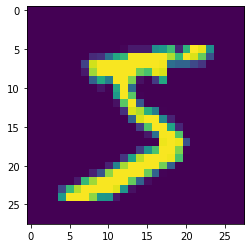

In [0]:
sample_no = 0
plt.imshow(mnist_train[sample_no][0])
print(f'Label: {mnist_train[sample_no][1]}')
print('Image:')
plt.show()

### Putting it all together

In [0]:
mnist_train = torchvision.datasets.MNIST(root = './data', download = True, train = True, transform = torchvision.transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root = './data', download = True, train = False, transform = torchvision.transforms.ToTensor())

In [0]:
# Create net, data loader, optimizer, and loss. Define Learning rate
learning_rate = 1e-1
BATCH_SIZE = 20

net = Net()
train_loader = DataLoader(mnist_train, batch_size = BATCH_SIZE, shuffle = True)
optimizer = optim.SGD(net.parameters(), lr = learning_rate)

# For classification, CrossEntropyLoss is a better loss function
# Furthermore labels don't have to be one hot encoded when using cross entropy
loss_func = nn.CrossEntropyLoss()

In [0]:
# Let's train!
N_EPOCHS = 10
for epoch in range(N_EPOCHS):

  for i, (images, labels) in enumerate(train_loader):
    # Prepare data
    net.zero_grad()

    # Forward pass
    predictions = net.forward(images)

    # Compute loss
    loss = loss_func(predictions, labels)

    # Backpropagate
    loss.backward()
    optimizer.step()

    # print('Batch ' + str(i) + ' of epoch ' + str(epoch) + ' complete')
  print('Epoch ' + str(epoch) + ' complete')

Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete


In [0]:
def find_label(t):
  value, index = torch.max(t, 1)
  # If we use softmax activation, then the model is value% sure that the label is index + 1
  return value.item(), index.item()

Our network is 99.95% sure that the number in the image is a 7


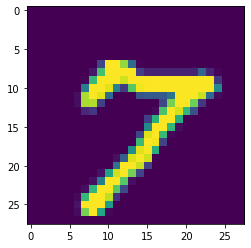

In [0]:
sample_no = 9000

image_tensor = mnist_test[sample_no][0]
prediction = find_label(net(image_tensor))
print(f'Our network is {prediction[0] * 100:.2f}% sure that the number in the image is a {prediction[1]}')

image = torchvision.transforms.ToPILImage()(image_tensor)
plt.imshow(image)
plt.show()

### Caveat

What happens if we feed a garbage image tensor to our classifier?

Our network is 57.98% sure that the number in the image is a 1


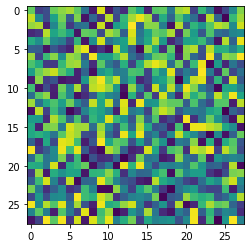

In [0]:
dims = mnist_test[0][0].size()
image_tensor = torch.randn(dims)
prediction = find_label(net(image_tensor))
print(f'Our network is {prediction[0] * 100:.2f}% sure that the number in the image is a {prediction[1]}')

image = torchvision.transforms.ToPILImage()(image_tensor)
plt.imshow(image)
plt.show()

### Exercise


* Read PyTorch's documentation about Conv2d and MaxPool2d classes
* Optionally, check the resources provided for understanding convolutions on the repo.
* Replace class definition above to use convolutional layers as first layers of network
* See how that changes network output. How does your network treat garbage inputs now?

In [0]:
# Your code here